# Week 8 Machine Learning Homework

## Instructions
Complete all exercises below by writing code in the cells provided. Focus on implementing and understanding the sigmoid function and evaluation metrics.

---

### Exercise 1: Sigmoid Function Implementation

Implement the sigmoid function from scratch and visualize it.

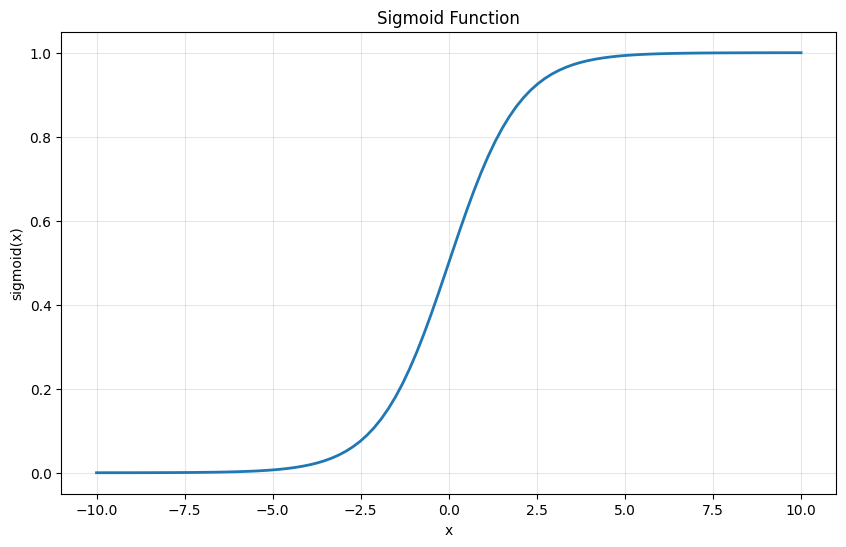

Sigmoid function test:
sigmoid(-5) = 0.0067
sigmoid(-2) = 0.1192
sigmoid(0) = 0.5000
sigmoid(2) = 0.8808
sigmoid(5) = 0.9933


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Implement the sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function for input x
    """
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 100)

# TODO: Compute sigmoid values for x_values
y_values = sigmoid(x_values)

# TODO: Create a plot of the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linewidth=2)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True, alpha=0.3)
plt.show()

# TODO: Test your implementation with specific values
test_values = [-5, -2, 0, 2, 5]
print("Sigmoid function test:")
for val in test_values:
    print(f"sigmoid({val}) = {sigmoid(val):.4f}")


### Exercise 2: Logistic Regression Probability Calculation

Use the sigmoid function to calculate class probabilities.

In [2]:
# Sample feature values and model coefficients
feature1 = 1.5
feature2 = -0.8
bias = 0.5
coef1 = 0.8
coef2 = -0.3

# TODO: Calculate linear combination z
z = coef1 * feature1 + coef2 * feature2 + bias

# TODO: Probability of class 1
probability = sigmoid(z)

print(f"Linear combination z: {z:.4f}")
print(f"Probability of class 1: {probability:.4f}")

# TODO: Prediction with threshold 0.5
prediction = 1 if probability >= 0.5 else 0
print(f"Predicted class: {prediction}")

# TODO: Function to compute probability & prediction
def predict_probability(features, coefficients, bias, threshold=0.5):
    """
    Calculate probability and prediction using sigmoid function
    """
    z = np.dot(features, coefficients) + bias
    prob = sigmoid(z)
    pred = 1 if prob >= threshold else 0
    return prob, pred

# Test the function
test_features = [1.5, -0.8]
test_coefficients = [0.8, -0.3]
test_bias = 0.5

prob, pred = predict_probability(test_features, test_coefficients, test_bias)
print(f"\nTest - Probability: {prob:.4f}, Prediction: {pred}")


Linear combination z: 1.9400
Probability of class 1: 0.8744
Predicted class: 1

Test - Probability: 0.8744, Prediction: 1


### Exercise 3: Confusion Matrix Implementation

Implement a confusion matrix calculation from scratch.

Confusion Matrix Components:
True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1


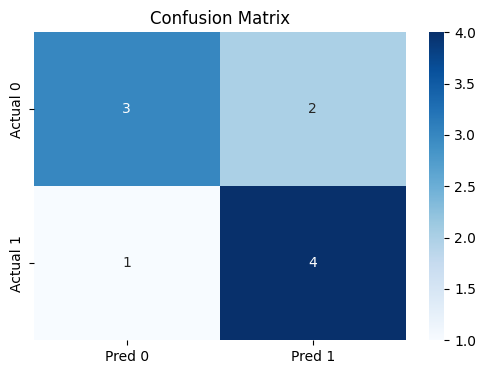

In [3]:
# Sample true labels and predictions
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# TODO: Calculate TP, TN, FP, FN
def calculate_confusion_matrix(y_true, y_pred):
    TP = TN = FP = FN = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            TP += 1
        elif yt == 0 and yp == 0:
            TN += 1
        elif yt == 0 and yp == 1:
            FP += 1
        elif yt == 1 and yp == 0:
            FN += 1
    return TP, TN, FP, FN

# Test your function
TP, TN, FP, FN = calculate_confusion_matrix(y_true, y_pred)

print("Confusion Matrix Components:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# TODO: Create a visualization of the confusion matrix
import seaborn as sns

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title('Confusion Matrix')
plt.show()


### Exercise 4: Classification Metrics Calculation

Implement accuracy, precision, recall, and F1-score from scratch.


In [4]:
# TODO: Implement classification metrics using confusion matrix components
def calculate_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1

# Calculate metrics
accuracy, precision, recall, f1 = calculate_metrics(TP, TN, FP, FN)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Classification Metrics:
Accuracy: 0.7000
Precision: 0.6667
Recall: 0.8000
F1-Score: 0.7273
